In [ ]:
!pip install -q statsmodels==0.14.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 63.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 100)

In [ ]:
URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(URL)
print("Shape:", df.shape)
df.head()

Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("\nInfo:")
df.info()
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))
print("\nNumeric describe:")
df.describe().T


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values per column:
Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
df.isna().sum().sort_values(ascending=False).head(10)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [ ]:
df_drop_rows = df.dropna(subset=['Age', 'Embarked'])  # drop rows where these are null
print("Original:", df.shape, "After drop:", df_drop_rows.shape)

Original: (891, 12) After drop: (712, 12)


In [ ]:
df_imp = df.copy()

df_imp['Age'] = df_imp['Age'].fillna(df_imp['Age'].median())

df_imp['Embarked'] = df_imp['Embarked'].fillna(df_imp['Embarked'].mode()[0])

df_imp['Cabin'] = df_imp['Cabin'].fillna('Unknown')

df_imp.isna().sum().head(10)

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
knn_df = df[num_cols].copy()
imputer = KNNImputer(n_neighbors=3)
knn_imputed = imputer.fit_transform(knn_df)
knn_imputed_df = pd.DataFrame(knn_imputed, columns=num_cols)
knn_imputed_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500


 Exercise 2
1) Compare mean vs median imputation for Age. Which preserves the original distribution better?
2) For Embarked, try filling with a new category ('Unknown') vs mode. What changes in value_counts()?

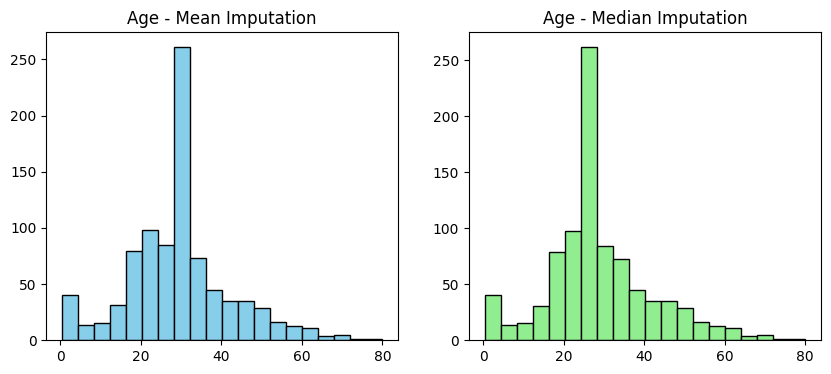

Embarked with 'Unknown':
Embarked
S          644
C          168
Q           77
Unknown      2
Name: count, dtype: int64 

Embarked with mode fill:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [ ]:
# Exercise 2

# 1) Compare mean vs median imputation for Age
age_mean = df["Age"].fillna(df["Age"].mean())
age_median = df["Age"].fillna(df["Age"].median())

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(age_mean, bins=20, color="skyblue", edgecolor="black")
plt.title("Age - Mean Imputation")

plt.subplot(1,2,2)
plt.hist(age_median, bins=20, color="lightgreen", edgecolor="black")
plt.title("Age - Median Imputation")

plt.show()

# 2) Embarked: fill with 'Unknown' vs mode
embarked_unknown = df["Embarked"].fillna("Unknown")
embarked_mode = df["Embarked"].fillna(df["Embarked"].mode()[0])

print("Embarked with 'Unknown':")
print(embarked_unknown.value_counts(), "\n")

print("Embarked with mode fill:")
print(embarked_mode.value_counts())


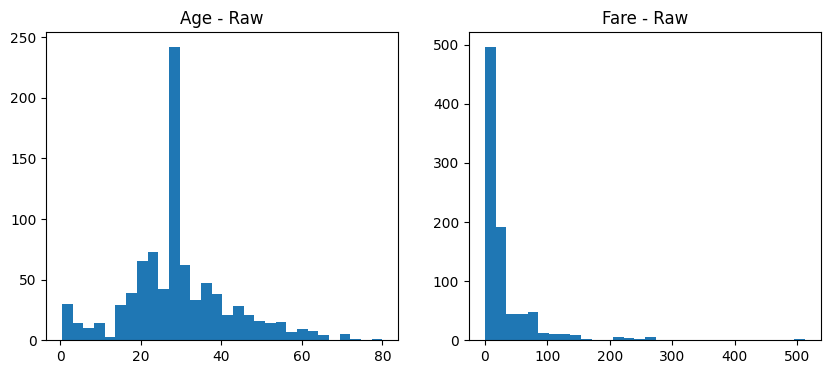

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(df_imp['Age'].dropna(), bins=30)
axes[0].set_title('Age - Raw')
axes[1].hist(df_imp['Fare'].dropna(), bins=30)
axes[1].set_title('Fare - Raw')
plt.show()

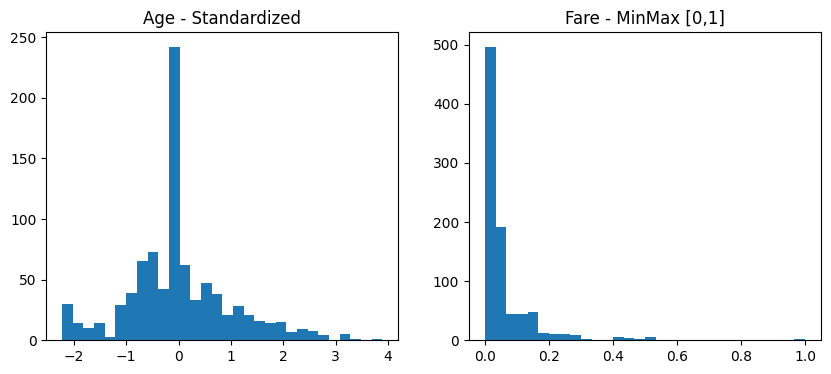

In [ ]:
sc_std = StandardScaler()
sc_mm  = MinMaxScaler()

age_std = sc_std.fit_transform(df_imp[['Age']])
fare_mm = sc_mm.fit_transform(df_imp[['Fare']])

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(age_std.flatten(), bins=30)
axes[0].set_title('Age - Standardized')
axes[1].hist(fare_mm.flatten(), bins=30)
axes[1].set_title('Fare - MinMax [0,1]')
plt.show()

Exercise 3
1) Standardize Fare and plot the histogram.
2) Apply Normalizer on [Age, Fare] rows and check the first 5 normalized vectors.

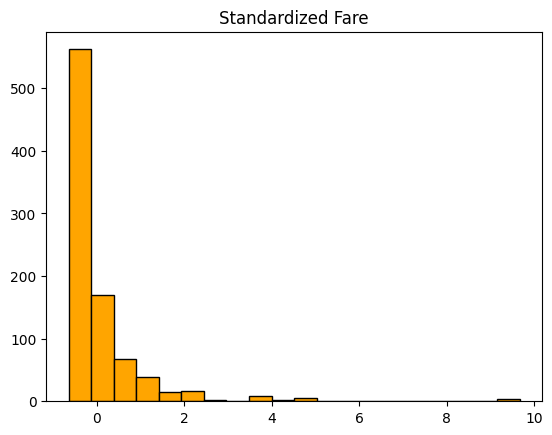

First 5 normalized vectors (Age, Fare):
[[0.94975704 0.31298812]
 [0.47041706 0.88244422]
 [0.95655127 0.29156418]
 [0.55033828 0.83494178]
 [0.97455519 0.22414769]]


In [ ]:
# Exercise 3

from sklearn.preprocessing import Normalizer

# 1) Standardize Fare
scaler = StandardScaler()
df["Fare_scaled"] = scaler.fit_transform(df[["Fare"]])

plt.hist(df["Fare_scaled"], bins=20, color="orange", edgecolor="black")
plt.title("Standardized Fare")
plt.show()

# 2) Normalizer on [Age, Fare]
norm = Normalizer()
normalized = norm.fit_transform(df[["Age", "Fare"]].fillna(0))  # fill NaN with 0 for demo

print("First 5 normalized vectors (Age, Fare):")
print(normalized[:5])


In [ ]:
enc = OrdinalEncoder()
ord_demo = df_imp[['Sex','Embarked']].copy()
ord_vals = enc.fit_transform(ord_demo)
pd.DataFrame(ord_vals, columns=['Sex_ord','Embarked_ord']).head()

,Sex_ord,Embarked_ord
0,1.0,2.0
1,0.0,0.0
2,0.0,2.0
3,0.0,2.0
4,1.0,2.0


In [ ]:
ohe_embarked = pd.get_dummies(df_imp['Embarked'], prefix='Embarked')
ohe_sex = pd.get_dummies(df_imp['Sex'], prefix='Sex')
encoded_df = pd.concat([df_imp[['Survived','Age','Fare']], ohe_sex, ohe_embarked], axis=1)
encoded_df.head()

,Survived,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,False,True,False,False,True
1,1,38.0,71.2833,True,False,True,False,False
2,1,26.0,7.9250,True,False,False,False,True
3,1,35.0,53.1000,True,False,False,False,True
4,0,35.0,8.0500,False,True,False,False,True


Exercise 4
1) Compare the number of features produced by ordinal vs one-hot for Embarked.
2) Why might one-hot be safer for linear models?

In [ ]:
# Exercise 4

from sklearn.preprocessing import OneHotEncoder

# Select column
embarked = df[["Embarked"]].fillna("Unknown")

# Ordinal Encoding
ord_enc = OrdinalEncoder()
embarked_ord = ord_enc.fit_transform(embarked)

# One-hot Encoding
ohe = OneHotEncoder(sparse_output=False)
embarked_ohe = ohe.fit_transform(embarked)

print("Ordinal encoding shape:", embarked_ord.shape)
print("One-hot encoding shape:", embarked_ohe.shape)

print("One-hot categories:", ohe.categories_)

Ordinal encoding shape: (891, 1)
One-hot encoding shape: (891, 4)
One-hot categories: [array(['C', 'Q', 'S', 'Unknown'], dtype=object)]


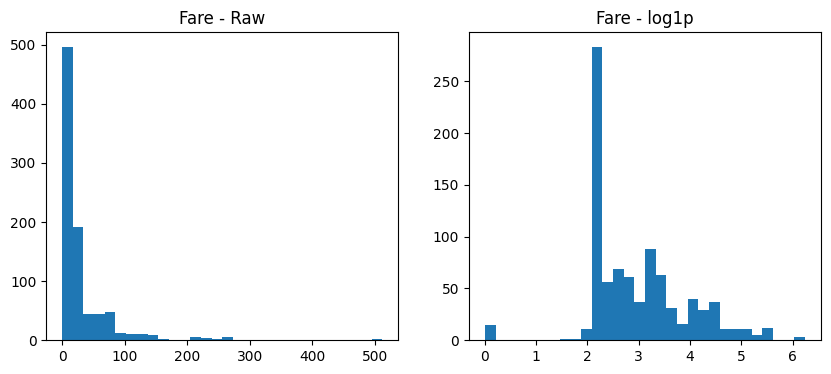

In [ ]:
fare_raw = df_imp['Fare'].dropna().values.reshape(-1,1)
fare_log = np.log1p(fare_raw)

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(fare_raw.flatten(), bins=30)
axes[0].set_title('Fare - Raw')
axes[1].hist(fare_log.flatten(), bins=30)
axes[1].set_title('Fare - log1p')
plt.show()

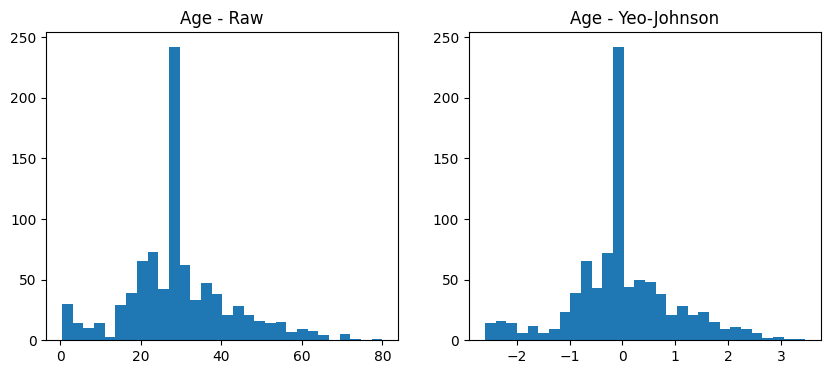

In [ ]:
pt = PowerTransformer(method='yeo-johnson')
af = df_imp[['Age','Fare']].dropna()
af_pt = pt.fit_transform(af)

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(af['Age'].values, bins=30)
axes[0].set_title('Age - Raw')
axes[1].hist(af_pt[:,0], bins=30)
axes[1].set_title('Age - Yeo-Johnson')
plt.show()

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
af_poly = poly.fit_transform(af[['Age','Fare']])
print("Original shape:", af[['Age','Fare']].shape, " -> With poly:", af_poly.shape)
poly.get_feature_names_out(['Age','Fare'])[:6]

Original shape: (891, 2)  -> With poly: (891, 5)


array(['Age', 'Fare', 'Age^2', 'Age Fare', 'Fare^2'], dtype=object)

 Exercise 5
1) Identify one numeric column that is skewed. Try both log and power transforms and compare histograms.
2) With PolynomialFeatures(2), which new terms are created from Age and Fare?

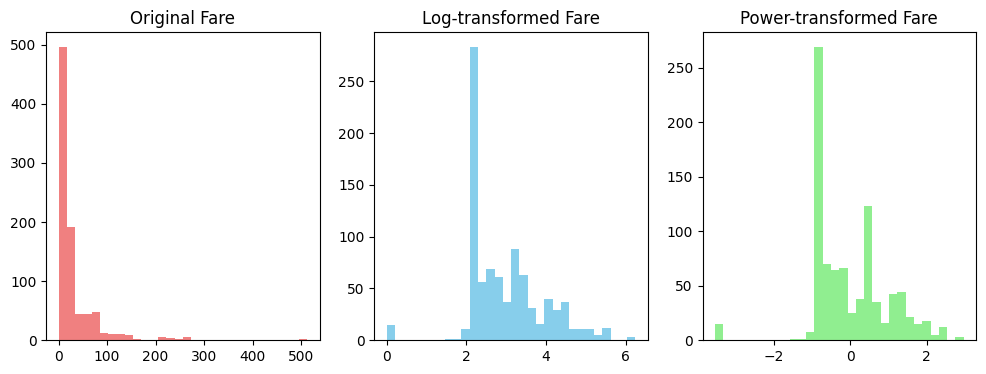

Polynomial feature names: ['Age' 'Fare' 'Age^2' 'Age Fare' 'Fare^2']
First 5 rows:
 [[  22.            7.25        484.          159.5          52.5625    ]
 [  38.           71.2833     1444.         2708.7654     5081.30885889]
 [  26.            7.925       676.          206.05         62.805625  ]
 [  35.           53.1        1225.         1858.5        2819.61      ]
 [  35.            8.05       1225.          281.75         64.8025    ]]


In [ ]:
# Exercise 5

# 1) Identify skewed column (Fare is usually skewed)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.hist(df["Fare"].dropna(), bins=30, color="lightcoral")
plt.title("Original Fare")

# Log transform
plt.subplot(1,3,2)
plt.hist(np.log1p(df["Fare"].dropna()), bins=30, color="skyblue")
plt.title("Log-transformed Fare")

# Power transform (Box-Cox / Yeo-Johnson)
pt = PowerTransformer()
fare_power = pt.fit_transform(df[["Fare"]].fillna(0))

plt.subplot(1,3,3)
plt.hist(fare_power, bins=30, color="lightgreen")
plt.title("Power-transformed Fare")
plt.show()

# 2) PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_feats = poly.fit_transform(df[["Age", "Fare"]].fillna(0))

print("Polynomial feature names:", poly.get_feature_names_out(["Age", "Fare"]))
print("First 5 rows:\n", poly_feats[:5])


Explained variance ratios: [0.96165195 0.03587775]


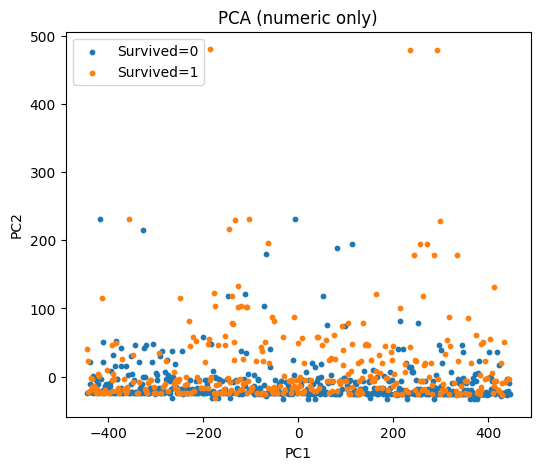

In [ ]:
num_only = df_imp.select_dtypes(include=['number']).dropna()
y = df_imp.loc[num_only.index, 'Survived'] if 'Survived' in df_imp.columns else None

pca = PCA(n_components=2, random_state=42)
Z = pca.fit_transform(num_only.values)

print("Explained variance ratios:", pca.explained_variance_ratio_)

plt.figure(figsize=(6,5))
if y is not None:

    idx0 = (y.values == 0)
    idx1 = (y.values == 1)
    plt.scatter(Z[idx0,0], Z[idx0,1], s=10, label='Survived=0')
    plt.scatter(Z[idx1,0], Z[idx1,1], s=10, label='Survived=1')
    plt.legend()
else:
    plt.scatter(Z[:,0], Z[:,1], s=10)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('PCA (numeric only)')
plt.show()

Exercise 6
1) Which two numeric columns contribute the most variance before PCA (use df.var())?
2) Try PCA with n_components=3 and print the cumulative explained variance.

In [ ]:
# Exercise 6

# 1) Columns with highest variance
print("Top 2 columns by variance:")
print(df.var(numeric_only=True).sort_values(ascending=False).head(2))

# 2) PCA with n_components=3
num_data = df.select_dtypes(include=[np.number]).fillna(0)

pca = PCA(n_components=3)
pca.fit(num_data)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance explained:", np.cumsum(pca.explained_variance_ratio_))

Top 2 columns by variance:
PassengerId    66231.000000
Fare            2469.436846
dtype: float64
Explained variance ratio: [0.95968938 0.03588773 0.00438821]
Cumulative variance explained: [0.95968938 0.99557711 0.99996531]
